<a href="https://colab.research.google.com/github/JanaUD/ML_Doc/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Decision Tree**

Make the Decision Tree algorithm for categories

In [ ]:
!pip install scikit-learn

Entropía del conjunto de datos: 1.570950594454669



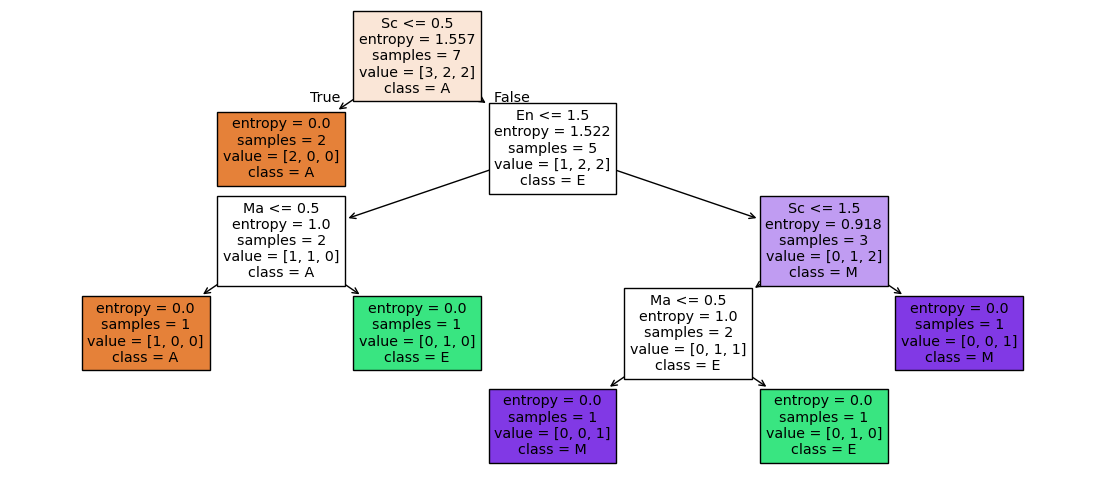


Desarrollado por: J.E. Carmona-Álvarez


In [ ]:
#Manejo de arreglos y matrices numéricas
import numpy as np

#Sk Learn Algoritmos de Machine Learning, preprocesamiento y métricas
#Convierte datos categóricos en números
from sklearn.preprocessing import LabelEncoder
#Divide los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
#Modelo de Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier
#Mide la precisión del modelo
from sklearn.metrics import accuracy_score
#Muestra métricas de rendimiento
from sklearn.metrics import classification_report

#Graficar el árbol de decisión
import matplotlib.pyplot as plt
#Dibuja el árbol de decisión
from sklearn.tree import plot_tree
#Tiene algoritmos de herramientas estadísticas avanzadas
from scipy.stats import entropy

# Datos en formato numpy
data = np.array([
    ["G", "G", "R", "E"],
    ["R", "G", "B", "M"],
    ["B", "R", "G", "A"],
    ["G", "R", "G", "E"],
    ["R", "B", "R", "A"],
    ["G", "G", "G", "E"],
    ["B", "G", "R", "M"],
    ["R", "R", "R", "M"],
    ["G", "B", "G", "A"],
    ["B", "B", "B", "A"]
])

# Separar características (X) y variable objetivo (y)
# Las 3 primeras columnas representan las caliicaciones de las asignaturas Matemáticas (Ma), Ciencias (Sc), e Ingles (En)
X = data[:, :-1]
# La última columna representa las preferencias de las carreras (Pc)
y = data[:, -1]

# Cálculo de la entropía antes de construir el árbol
unique, counts = np.unique(y, return_counts=True)
probabilities = counts / counts.sum()
H = entropy(probabilities, base=2)
print("Entropía del conjunto de datos:", H)
print("")

# Codificar datos categóricos a números correctamente
label_encoders = [LabelEncoder() for _ in range(X.shape[1])]  # Un encoder por cada columna
X_encoded = np.array([le.fit_transform(X[:, i]) for i, le in enumerate(label_encoders)]).T

# Codificar la variable objetivo
encoder_y = LabelEncoder()
y_encoded = encoder_y.fit_transform(y)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Entrenar el modelo
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)

# Visualizar el árbol de decisión
plt.figure(figsize=(14, 6))
plot_tree(clf, feature_names=["Ma", "Sc", "En"], class_names=encoder_y.classes_, filled=True)
plt.show()






![](https://raw.githubusercontent.com/JanaUD/ML_Doc/main/Arbol%20de%20decisiones-DecisionTreeClassifier.png)

Explore the scikit-learn algorithms

In [ ]:
from sklearn.utils import all_estimators

modelos = all_estimators()
print([modelo[0] for modelo in modelos])


['ARDRegression', 'AdaBoostClassifier', 'AdaBoostRegressor', 'AdditiveChi2Sampler', 'AffinityPropagation', 'AgglomerativeClustering', 'BaggingClassifier', 'BaggingRegressor', 'BayesianGaussianMixture', 'BayesianRidge', 'BernoulliNB', 'BernoulliRBM', 'Binarizer', 'Birch', 'BisectingKMeans', 'CCA', 'CalibratedClassifierCV', 'CategoricalNB', 'ClassifierChain', 'ColumnTransformer', 'ComplementNB', 'CountVectorizer', 'DBSCAN', 'DecisionTreeClassifier', 'DecisionTreeRegressor', 'DictVectorizer', 'DictionaryLearning', 'DummyClassifier', 'DummyRegressor', 'ElasticNet', 'ElasticNetCV', 'EllipticEnvelope', 'EmpiricalCovariance', 'ExtraTreeClassifier', 'ExtraTreeRegressor', 'ExtraTreesClassifier', 'ExtraTreesRegressor', 'FactorAnalysis', 'FastICA', 'FeatureAgglomeration', 'FeatureHasher', 'FeatureUnion', 'FixedThresholdClassifier', 'FrozenEstimator', 'FunctionTransformer', 'GammaRegressor', 'GaussianMixture', 'GaussianNB', 'GaussianProcessClassifier', 'GaussianProcessRegressor', 'GaussianRandomPr

**Ejemplo 1:** DecisionTreeClassifier

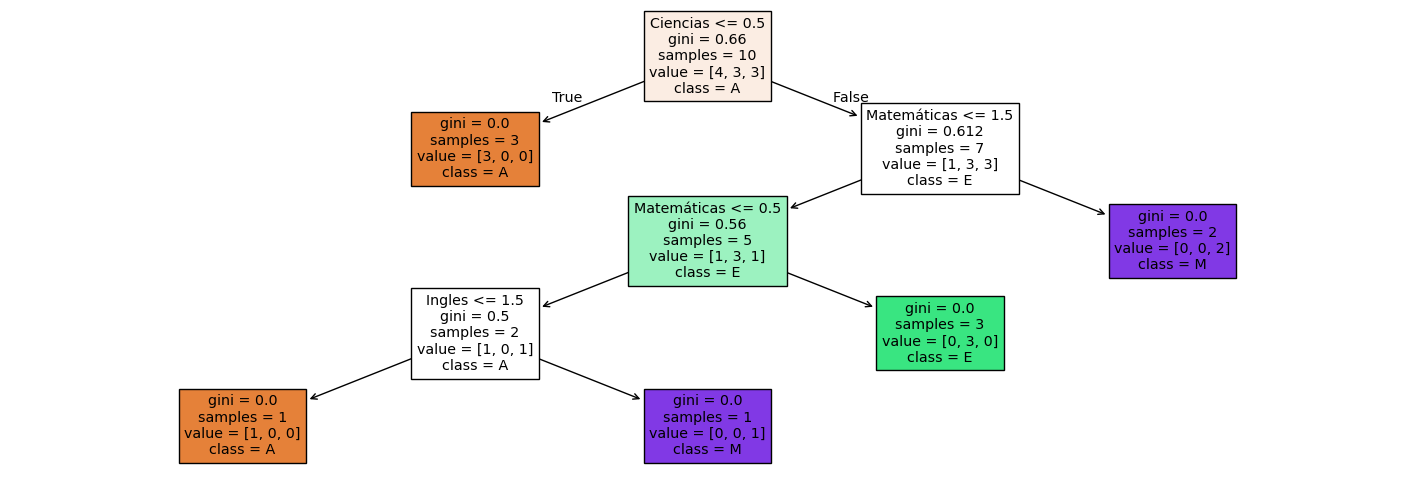

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Datos originales
data = [
    ["G", "G", "R", "E"],
    ["R", "G", "B", "M"],
    ["B", "R", "G", "A"],
    ["G", "R", "G", "E"],
    ["R", "B", "R", "A"],
    ["G", "G", "G", "E"],
    ["B", "G", "R", "M"],
    ["R", "R", "R", "M"],
    ["G", "B", "G", "A"],
    ["B", "B", "B", "A"]
]

# Convertir los datos en un DataFrame
df = pd.DataFrame(data, columns=["Matemáticas", "Ciencias", "Ingles", "Carrera"])

# Usar LabelEncoder para convertir las letras en números
le = LabelEncoder()

# Aplicamos el LabelEncoder a todas las columnas excepto la de clase
df["Matemáticas"] = le.fit_transform(df["Matemáticas"])
df["Ciencias"] = le.fit_transform(df["Ciencias"])
df["Ingles"] = le.fit_transform(df["Ingles"])
df["Carrera"] = le.fit_transform(df["Carrera"])

# Separar las características y la clase
X = df[["Matemáticas", "Ciencias", "Ingles"]]  # Características
y = df["Carrera"]  # Clase

# El algoritmo sklearn por defecto crea y entrenar el árbol de decisión por el metodo de GINI
# Para usar el metodo de Entropy se usa la expresión 'DecisionTreeClassifier(criterion="entropy", random_state=42)'
#clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
#clf.fit(X, y)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Graficar el árbol de decisión
plt.figure(figsize=(18, 6))
plot_tree(clf, feature_names=["Matemáticas", "Ciencias", "Ingles"], class_names=le.classes_, filled=True)

# Guardar la imagen
plt.savefig('decision_tree_entropy.png')

# Mostrar la imagen
plt.show()




RandomForestClassifier